In [138]:
import sys
import os
import numpy as np
import jax.numpy as jnp
import vedo
from vedo import Volume, show
import vedo.plotter  # https://vedo.embl.es/docs/vedo/plotter.html#Plotter
from vedo.colors import color_map
vedo.settings.default_backend = "vtk"
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


plotter = vedo.Plotter(axes=6, bg="white", size=(1600, 800))

In [139]:
data_path = "data_/"
IN_NUM = "0"
plotter = vedo.Plotter(axes=6, bg="white", size=(1600, 800))

p0_file = f"{data_path}p0/{IN_NUM}.npy"
if os.path.exists(p0_file):
    p0 = jnp.load(p0_file)
    p0_vol = Volume(p0)
    # p0_vol.cmap(["white", "b", "g", "r"]).mode(1)
    print(f"Loaded {p0_file}")
else:
    print(f"File {p0_file} does not exist")
# plotter.show(p0_vol)#, interactive=True)


Loaded data_/p0/0.npy


In [140]:
# p_r_volshape

In [142]:
p_r_file = f"{data_path}p_r/{IN_NUM}.npy"
plotter = vedo.Plotter(axes=6, bg="white", size=(1600, 800))

if os.path.exists(p_r_file):
    p_r = jnp.load(p_r_file)
    # vmax = np.max(np.abs(p_r)) 
    # vmin = -vmax
    p_r_vol = Volume(p_r[...,0]).cmap("b").mode(1)
    #threshold 
    p_r_vol.add_scalarbar(title="p_r", c="b")
    p_r_vol.threshold(below=0.002, replace=0)
    # p_r_vol.cmap(["white", "b", "g", "r"]).mode(1)
    # show_items.append(p_r_vol)
    print(f"Loaded {p_r_file}")
else:
    print(f"File {p_r_file} does not exist")

# plotter.show(p_r_vol)#, interactive=True)
plotter.show(p0_vol,p_r_vol)#, interactive=True)


Loaded data_/p_r/0.npy


In [215]:
p_data.shape

(1275, 64, 1)

Loaded data_/p_data/0.npy


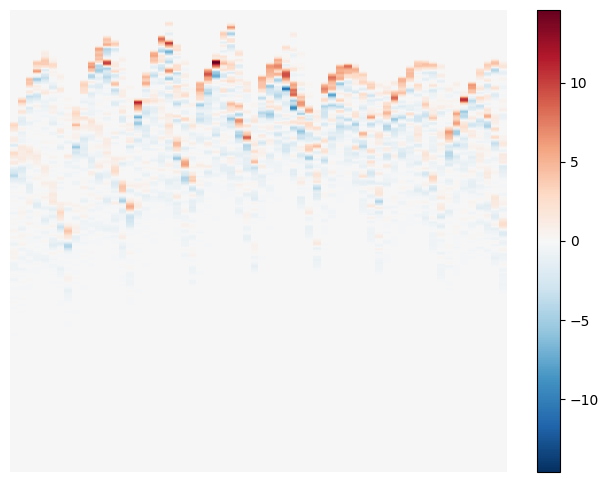

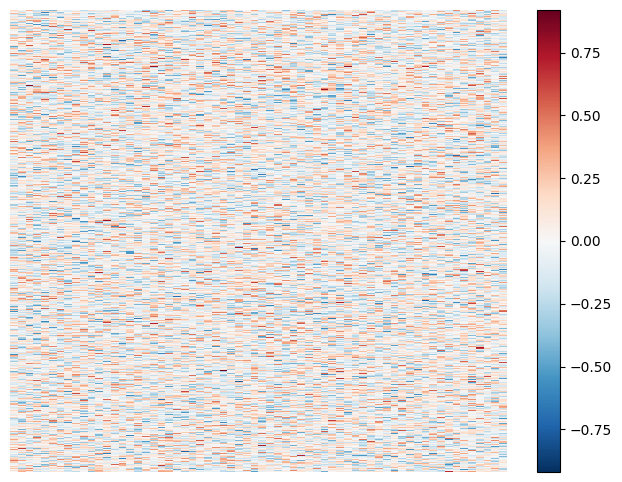

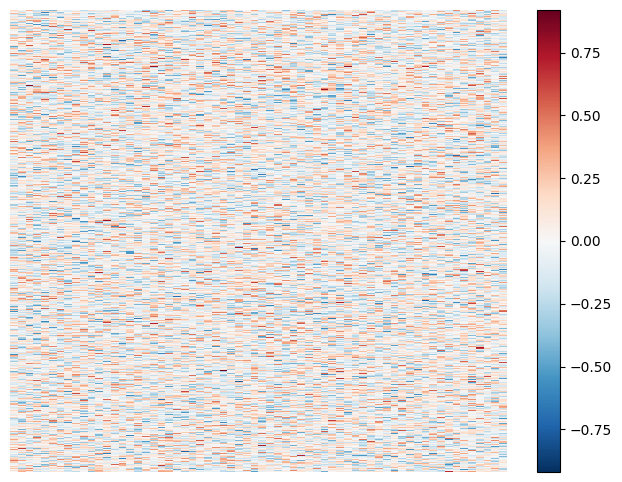

In [231]:
from jwave.utils import show_field
from jwave.signal_processing import smooth
from jax import random

p_data_file = f"{data_path}p_data/{IN_NUM}.npy"
if os.path.exists(p_data_file):
    p_data = jnp.load(p_data_file)
    print(f"Loaded {p_data_file}")

# plt.imshow(p_data[...,0], cmap="bwr", interpolation="none")
def add_colored_noise(key, p_data, amplitude=0.2):
    """
    Add colored noise to the data

    Parameters
    ----------
    key : PRNGKey
        Random key
    p_data : ndarray
        Pressure data
    blackman_window_exponent : float
        Exponent of the Blackman window
    amplitude : float
        Amplitude of the noise
    
    Returns
    -------
    ndarray
    """
    noise = random.normal(random.PRNGKey(key), p_data.shape)
    for i in range(noise.shape[1]):
        noise = noise.at[:, i].set(smooth(noise[:, i],0))
    return p_data + amplitude * noise


p_data_noisy = add_colored_noise(random.PRNGKey(0)[0], p_data, amplitude=.2)

def normalize_data(data):
    mean = jnp.mean(data)
    std = jnp.std(data)
    normalized_data = (data - mean) / std
    return normalized_data

show_field(normalize_data(p_data))
# show_field(p_data)
show_field(p_data_noisy)
show_field(p_data_noisy)

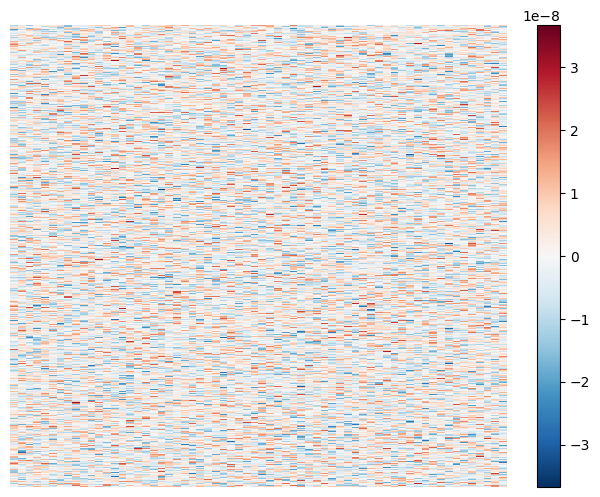

In [194]:
# Add colored noise
noise = random.normal(random.PRNGKey(42), p_data.shape)
for i in range(noise.shape[1]):
    noise = noise.at[:, i].set(smooth(noise[:, i],1))
# plt.imshow(noise)
# jnp.max(noise)
show_field(noise)

In [103]:
from vedo import Plotter, Volume

# Example volumes (replace these with your actual volume data)
# p0_vol = Volume(vedo.dataurl + 'embryo.tif')
# p_r_vol = Volume(vedo.dataurl + 'embryo.tif')
p_r_vol.alpha([0, 0.4, 0.9, 1])  # Adjust transparency levels

# Initialize the plotter
plt = Plotter()

# Function to toggle visibility of a volume
def toggle_volume_1(p1, p2):
    # print(p1, p2)
    # if vol.mode()==2:
    #     vol.mode(0)
    # elif vol.mode()==0:
    #     vol.mode(2)
    # b1.switch()
    p1["Visibility"] = not p1["Visibility"]

def toggle_volume_2(button, vol):
    if vol.mode()==2:
        vol.mode(0)
    elif vol.mode()==0:
        vol.mode(2)
    b2.switch()

# Add volumes to the plotter
plt += p0_vol
plt += p_r_vol

# Add buttons to toggle the volumes
b1 = plt.add_button(
    toggle_volume_1,
    pos=(0.1, 0.1),  # position of the button
    states=["Hide p0_vol", "Show p0_vol"],
    c=["w", "w"],     # text color
    bc=["violet", "gray"],  # background color
    font="courier",
    size=18,
    bold=True,
    # funcArgs=[p0_vol]
)

b2 = plt.add_button(
    toggle_volume_2,
    pos=(0.1, 0.2),  # position of the button
    states=["Hide p_r_vol", "Show p_r_vol"],
    c=["w", "w"],     # text color
    bc=["blue", "gray"],  # background color
    font="courier",
    size=18,
    bold=True,
    # funcArgs=[p_r_vol]
)

# Show the plotter and its contents
plt.show()
